In [32]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

%matplotlib inline


# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

In [33]:
data = pd.read_csv('drug_and_personality.csv')
data

,Participant,Sex,Age,IQ,Sense_of_agency,Intentionality_bias,Free_will,Unpredictability,Narcissism,Cannabis,...,fre_alcohol,fre_tranquilizers,fre_psychotropics,fre_cannabis,fre_amphetamine,fre_Ecstasy,fre_LSD,fre_mushrooms,fre_ketamine,fre_cocaine
0,2,2.0,23.0,119.0,-69.99,0.50,27,27,35,1,...,4.0,0.0,0.0,0,0,0,0,0,0,0
1,3,2.0,22.0,126.0,100.67,0.42,23,16,53,1,...,3.0,0.0,0.0,0,0,0,0,0,0,0
2,9,2.0,22.0,94.0,100.66,0.50,25,29,31,2,...,4.0,0.0,0.0,1,0,0,0,0,0,0
3,10,2.0,21.0,142.0,-27.34,0.54,24,19,47,1,...,3.0,0.0,0.0,0,0,0,0,0,0,0
4,11,1.0,24.0,119.5,-27.34,0.50,29,28,43,2,...,5.0,0.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,223,2.0,27.0,103.0,117.50,0.71,15,18,47,2,...,5.0,3.0,3.0,5,5,5,3,2,5,4
163,224,2.0,27.0,118.0,55.88,0.96,19,25,59,1,...,4.0,1.0,2.0,2,3,2,1,1,1,1
164,225,2.0,31.0,110.5,40.51,0.63,22,22,50,2,...,3.0,0.0,0.0,6,1,1,3,1,1,1
165,226,1.0,29.0,107.5,77.91,0.42,21,30,38,2,...,6.0,1.0,1.0,9,4,4,2,2,2,3


In [34]:
data.columns

Index(['Participant', 'Sex', 'Age', 'IQ', 'Sense_of_agency',
       'Intentionality_bias', 'Free_will', 'Unpredictability', 'Narcissism',
       'Cannabis', 'Amphetamine', 'Ecstasy', 'LSD', 'Mushrooms', 'Ketamine',
       'Cocaine', 'more_than_cannabis', 'more_than_cannabis=2', 'fre_alcohol',
       'fre_tranquilizers', 'fre_psychotropics', 'fre_cannabis',
       'fre_amphetamine', 'fre_Ecstasy', 'fre_LSD', 'fre_mushrooms',
       'fre_ketamine', 'fre_cocaine'],
      dtype='object')

In [35]:
data.describe()

,Participant,Sex,Age,IQ,Sense_of_agency,Intentionality_bias,Free_will,Unpredictability,Narcissism,Cannabis,...,fre_alcohol,fre_tranquilizers,fre_psychotropics,fre_cannabis,fre_amphetamine,fre_Ecstasy,fre_LSD,fre_mushrooms,fre_ketamine,fre_cocaine
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,...,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,118.359281,1.604790,23.329341,118.553892,67.893772,0.611257,23.131737,25.754491,47.976048,1.610778,...,3.562874,0.580838,0.574850,2.377246,0.952096,0.946108,0.742515,0.670659,0.760479,0.760479
std,66.289182,0.490366,3.571040,15.779450,107.383373,0.177089,3.452868,4.989709,10.206868,0.489040,...,1.154065,0.714137,0.671334,2.506898,1.293209,1.208691,0.969188,0.831917,1.087772,1.019151
min,2.000000,1.000000,17.000000,88.000000,-176.660000,0.250000,15.000000,14.000000,24.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,1.000000,20.000000,107.500000,-12.100000,0.500000,21.000000,22.000000,39.500000,1.000000,...,3.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,124.000000,2.000000,23.000000,119.500000,53.450000,0.540000,23.000000,26.000000,49.000000,2.000000,...,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,174.000000,2.000000,26.000000,128.500000,122.000000,0.710000,25.000000,29.000000,56.000000,2.000000,...,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,229.000000,2.000000,34.000000,145.000000,322.780000,1.000000,31.000000,38.000000,73.000000,2.000000,...,6.000000,5.000000,3.000000,9.000000,5.000000,6.000000,5.000000,4.000000,6.000000,6.000000


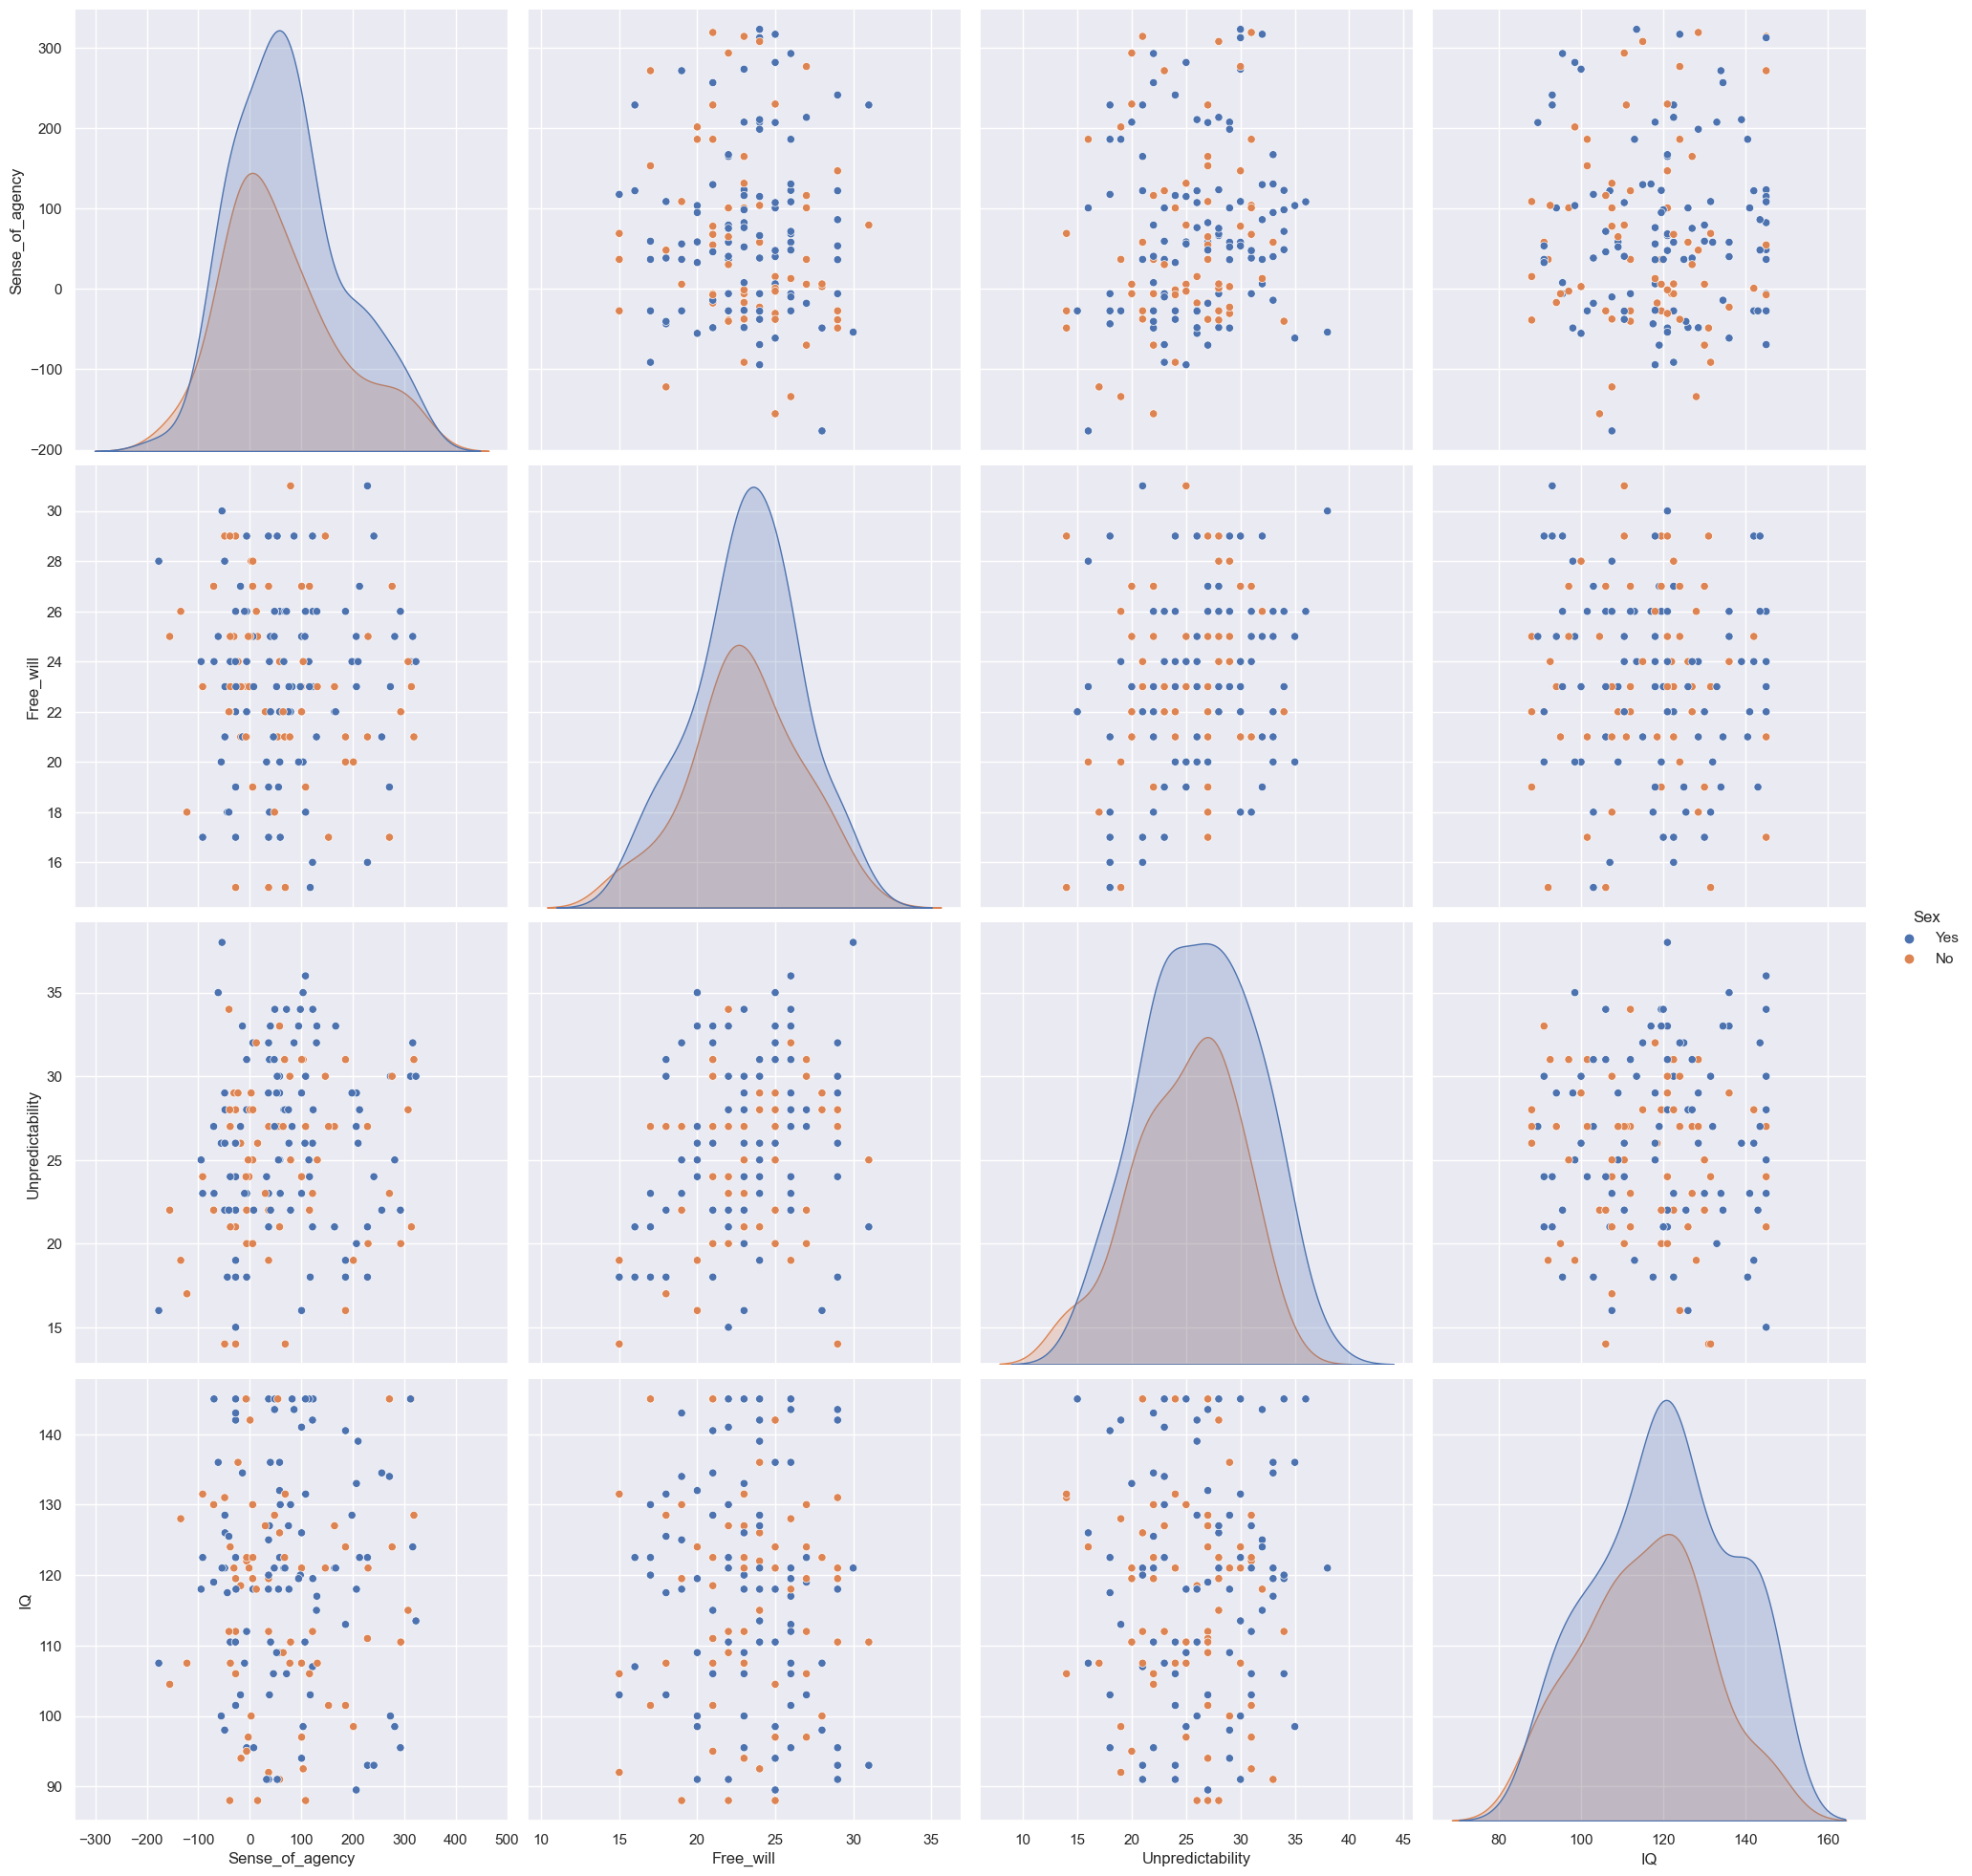

In [36]:
data.replace({1: 'No', 2: 'Yes'}, inplace=True)
g = sns.pairplot(data[['Intentionality_bias','Sense_of_agency','Free_will','Unpredictability','IQ','Sex']],
                 hue = 'Sex', height = 5)

In [37]:
data.dtypes

Participant              object
Sex                      object
Age                     float64
IQ                      float64
Sense_of_agency         float64
Intentionality_bias      object
Free_will                 int64
Unpredictability          int64
Narcissism                int64
Cannabis                 object
Amphetamine              object
Ecstasy                  object
LSD                      object
Mushrooms                object
Ketamine                 object
Cocaine                  object
more_than_cannabis       object
more_than_cannabis=2     object
fre_alcohol              object
fre_tranquilizers        object
fre_psychotropics        object
fre_cannabis             object
fre_amphetamine          object
fre_Ecstasy              object
fre_LSD                  object
fre_mushrooms            object
fre_ketamine             object
fre_cocaine              object
dtype: object

In [38]:
data.isnull().sum()

Participant             0
Sex                     0
Age                     0
IQ                      0
Sense_of_agency         0
Intentionality_bias     0
Free_will               0
Unpredictability        0
Narcissism              0
Cannabis                0
Amphetamine             0
Ecstasy                 0
LSD                     0
Mushrooms               0
Ketamine                0
Cocaine                 0
more_than_cannabis      0
more_than_cannabis=2    0
fre_alcohol             0
fre_tranquilizers       0
fre_psychotropics       0
fre_cannabis            0
fre_amphetamine         0
fre_Ecstasy             0
fre_LSD                 0
fre_mushrooms           0
fre_ketamine            0
fre_cocaine             0
dtype: int64

In [39]:
data['Intentionality_bias'] = pd.to_numeric(data['Intentionality_bias'], errors='coerce')
data.dtypes

Participant              object
Sex                      object
Age                     float64
IQ                      float64
Sense_of_agency         float64
Intentionality_bias     float64
Free_will                 int64
Unpredictability          int64
Narcissism                int64
Cannabis                 object
Amphetamine              object
Ecstasy                  object
LSD                      object
Mushrooms                object
Ketamine                 object
Cocaine                  object
more_than_cannabis       object
more_than_cannabis=2     object
fre_alcohol              object
fre_tranquilizers        object
fre_psychotropics        object
fre_cannabis             object
fre_amphetamine          object
fre_Ecstasy              object
fre_LSD                  object
fre_mushrooms            object
fre_ketamine             object
fre_cocaine              object
dtype: object

In [40]:
data.isnull().sum()

Participant              0
Sex                      0
Age                      0
IQ                       0
Sense_of_agency          0
Intentionality_bias     11
Free_will                0
Unpredictability         0
Narcissism               0
Cannabis                 0
Amphetamine              0
Ecstasy                  0
LSD                      0
Mushrooms                0
Ketamine                 0
Cocaine                  0
more_than_cannabis       0
more_than_cannabis=2     0
fre_alcohol              0
fre_tranquilizers        0
fre_psychotropics        0
fre_cannabis             0
fre_amphetamine          0
fre_Ecstasy              0
fre_LSD                  0
fre_mushrooms            0
fre_ketamine             0
fre_cocaine              0
dtype: int64

In [41]:
# Convert the column to float, but replace '1' with 1.0
data['Intentionality_bias'] = pd.to_numeric(data['Intentionality_bias'], errors='coerce').fillna(1.0)

In [42]:
data.isnull().sum()

Participant             0
Sex                     0
Age                     0
IQ                      0
Sense_of_agency         0
Intentionality_bias     0
Free_will               0
Unpredictability        0
Narcissism              0
Cannabis                0
Amphetamine             0
Ecstasy                 0
LSD                     0
Mushrooms               0
Ketamine                0
Cocaine                 0
more_than_cannabis      0
more_than_cannabis=2    0
fre_alcohol             0
fre_tranquilizers       0
fre_psychotropics       0
fre_cannabis            0
fre_amphetamine         0
fre_Ecstasy             0
fre_LSD                 0
fre_mushrooms           0
fre_ketamine            0
fre_cocaine             0
dtype: int64

In [43]:
data.columns

Index(['Participant', 'Sex', 'Age', 'IQ', 'Sense_of_agency',
       'Intentionality_bias', 'Free_will', 'Unpredictability', 'Narcissism',
       'Cannabis', 'Amphetamine', 'Ecstasy', 'LSD', 'Mushrooms', 'Ketamine',
       'Cocaine', 'more_than_cannabis', 'more_than_cannabis=2', 'fre_alcohol',
       'fre_tranquilizers', 'fre_psychotropics', 'fre_cannabis',
       'fre_amphetamine', 'fre_Ecstasy', 'fre_LSD', 'fre_mushrooms',
       'fre_ketamine', 'fre_cocaine'],
      dtype='object')

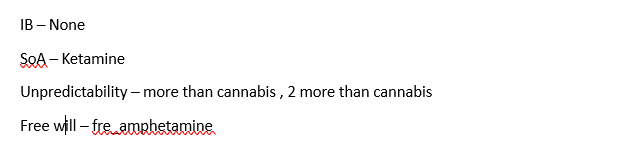

# Intentionality Bias

In [44]:
# Performing ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'Intentionality_bias ~ C(Cannabis) + C(Amphetamine) + C(Ecstasy) + C(LSD) + C(Mushrooms) + C(Ketamine) + C(Cocaine) + C(Q("more_than_cannabis")) + C(Q("more_than_cannabis=2"))'
model = ols(formula ,data=data).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
anova_results

,sum_sq,df,F,PR(>F)
C(Cannabis),0.056172,1.0,1.804630,0.181080
C(Amphetamine),0.001239,1.0,0.039797,0.842135
C(Ecstasy),0.051451,1.0,1.652976,0.200435
C(LSD),0.001034,1.0,0.033226,0.855597
C(Mushrooms),0.000134,1.0,0.004302,0.947785
C(Ketamine),0.047327,1.0,1.520468,0.219380
C(Cocaine),0.096635,1.0,3.104586,0.080006
"C(Q(""more_than_cannabis""))",0.060991,1.0,1.959471,0.163530
"C(Q(""more_than_cannabis=2""))",0.060991,1.0,1.959471,0.163530
Residual,4.917987,158.0,NaN,NaN


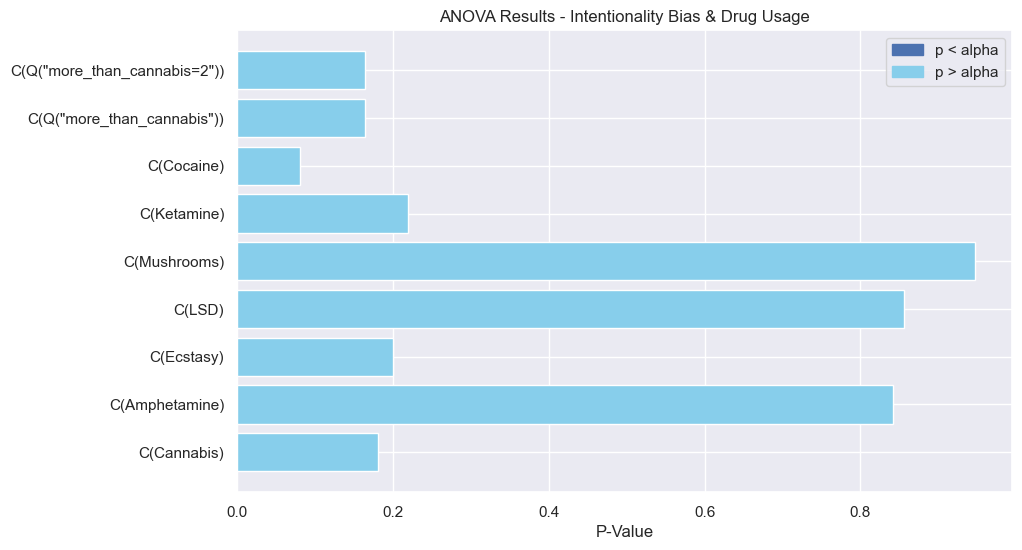

In [45]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

p_values = anova_results['PR(>F)']
variables = p_values.index

alpha = 0.05
colors = ['b' if p < alpha else 'skyblue' for p in p_values]

plt.figure(figsize=(10, 6))
plt.barh(variables, p_values, color=colors)
plt.xlabel('P-Value')
plt.title('ANOVA Results - Intentionality Bias & Drug Usage')
plt.legend(handles=[mpatches.Patch(color='b', label='p < alpha'),
                    mpatches.Patch(color='skyblue', label='p > alpha')], 
           loc='upper right')

plt.show()

In [46]:
#print(model.summary())

In [47]:
formula = 'Intentionality_bias ~ C(fre_alcohol) + C(fre_tranquilizers) + C(fre_psychotropics) + C(fre_cannabis) + C(fre_amphetamine) + C(fre_Ecstasy) + C(fre_LSD) + C(fre_mushrooms) + C(fre_ketamine) + C(fre_cocaine)'

model = ols(formula, data=data).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
anova_results

,sum_sq,df,F,PR(>F)
C(fre_alcohol),0.190502,5.0,1.500341,0.195147
C(fre_tranquilizers),0.068342,4.0,0.672802,0.612160
C(fre_psychotropics),0.107525,3.0,1.411396,0.243070
C(fre_cannabis),0.446650,8.0,2.198560,0.032422
C(fre_amphetamine),0.102312,5.0,0.805778,0.547809
C(fre_Ecstasy),0.177237,6.0,1.163228,0.330916
C(fre_LSD),0.143718,5.0,1.131883,0.347537
C(fre_mushrooms),0.257197,4.0,2.532021,0.044116
C(fre_ketamine),0.389574,6.0,2.556816,0.023189
C(fre_cocaine),0.125431,5.0,0.987860,0.428366


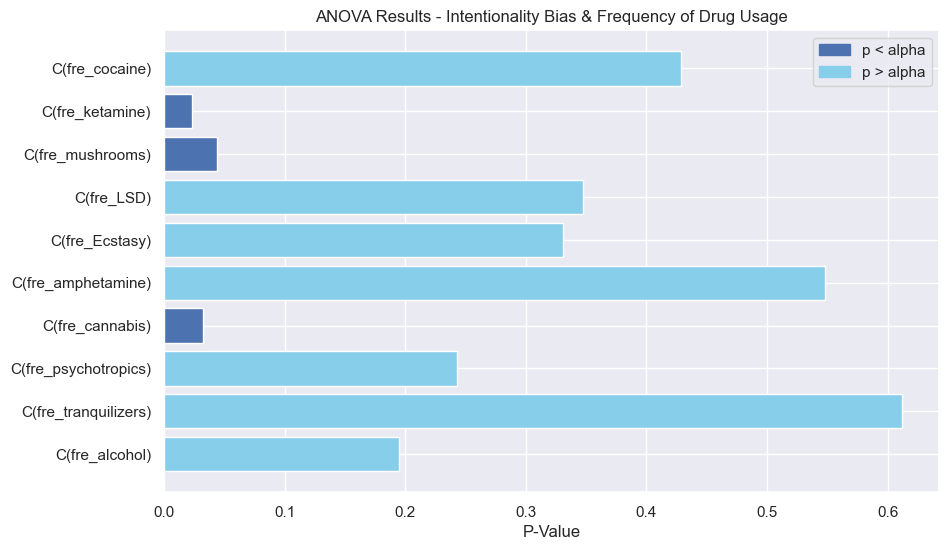

In [48]:
# Visualizing the results with a bar plot
p_values = anova_results['PR(>F)']
variables = p_values.index

alpha = 0.05
colors = ['b' if p < alpha else 'skyblue' for p in p_values]

plt.figure(figsize=(10, 6))
plt.barh(variables, p_values, color=colors)
plt.xlabel('P-Value')
plt.title('ANOVA Results - Intentionality Bias & Frequency of Drug Usage')
plt.legend(handles=[mpatches.Patch(color='b', label='p < alpha'),
                    mpatches.Patch(color='skyblue', label='p > alpha')], 
           loc='upper right')

plt.show()


# Sense of Agency

In [49]:
# Performing ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'Sense_of_agency ~ C(Cannabis) + C(Amphetamine) + C(Ecstasy) + C(LSD) + C(Mushrooms) + C(Ketamine) + C(Cocaine) + C(Q("more_than_cannabis")) + C(Q("more_than_cannabis=2"))'
model = ols(formula, data=data).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
anova_results

,sum_sq,df,F,PR(>F)
C(Cannabis),2.663362e+03,1.0,0.231115,0.631363
C(Amphetamine),2.834264e+03,1.0,0.245945,0.620634
C(Ecstasy),3.125701e+03,1.0,0.271235,0.603234
C(LSD),1.516652e+04,1.0,1.316086,0.253030
C(Mushrooms),4.686423e+03,1.0,0.406668,0.524589
C(Ketamine),5.681461e+04,1.0,4.930131,0.027815
C(Cocaine),2.257723e+04,1.0,1.959156,0.163564
"C(Q(""more_than_cannabis""))",1.187773e+03,1.0,0.103070,0.748601
"C(Q(""more_than_cannabis=2""))",1.187773e+03,1.0,0.103070,0.748601
Residual,1.820785e+06,158.0,NaN,NaN


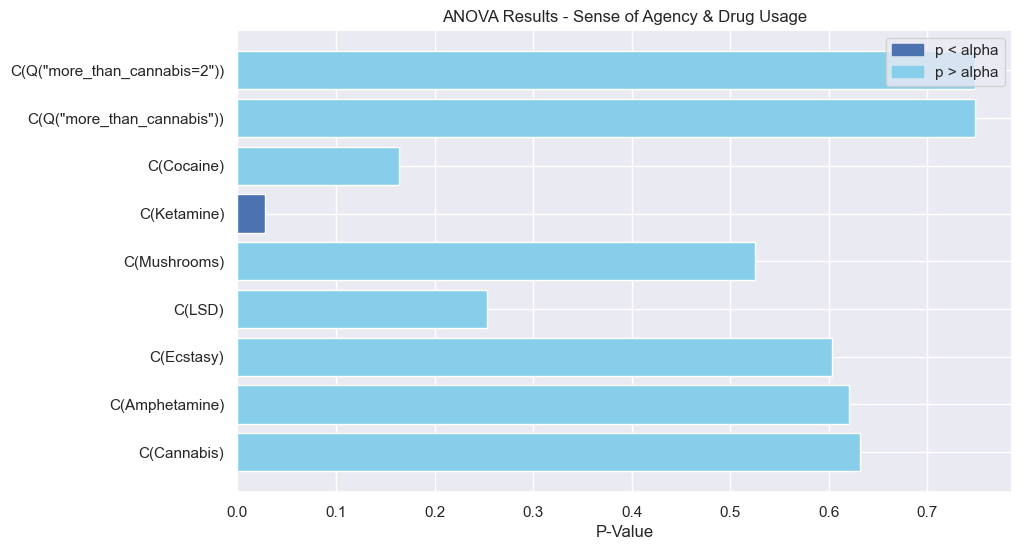

In [50]:
# Visualizing the results with a bar plot
p_values = anova_results['PR(>F)']
variables = p_values.index

alpha = 0.05
colors = ['b' if p < alpha else 'skyblue' for p in p_values]

plt.figure(figsize=(10, 6))
plt.barh(variables, p_values, color=colors)
plt.xlabel('P-Value')
plt.title('ANOVA Results - Sense of Agency & Drug Usage')
plt.legend(handles=[mpatches.Patch(color='b', label='p < alpha'),
                    mpatches.Patch(color='skyblue', label='p > alpha')], 
           loc='upper right')

plt.show()

In [51]:
formula = 'Sense_of_agency ~ C(fre_alcohol) + C(fre_tranquilizers) + C(fre_psychotropics) + C(fre_cannabis) + C(fre_amphetamine) + C(fre_Ecstasy) + C(fre_LSD) + C(fre_mushrooms) + C(fre_ketamine) + C(fre_cocaine)'
model = ols(formula, data=data).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
anova_results

,sum_sq,df,F,PR(>F)
C(fre_alcohol),5.644453e+04,5.0,1.012327,0.413753
C(fre_tranquilizers),1.636801e+04,4.0,0.366948,0.831745
C(fre_psychotropics),4.754173e+04,3.0,1.421094,0.240238
C(fre_cannabis),1.088958e+05,8.0,1.220647,0.293187
C(fre_amphetamine),2.346531e+04,5.0,0.420848,0.833406
C(fre_Ecstasy),3.762914e+04,6.0,0.562396,0.759441
C(fre_LSD),2.755145e+04,5.0,0.494132,0.780080
C(fre_mushrooms),1.467560e+04,4.0,0.329007,0.857995
C(fre_ketamine),2.251787e+04,6.0,0.336546,0.916328
C(fre_cocaine),4.135650e+04,5.0,0.741725,0.593762


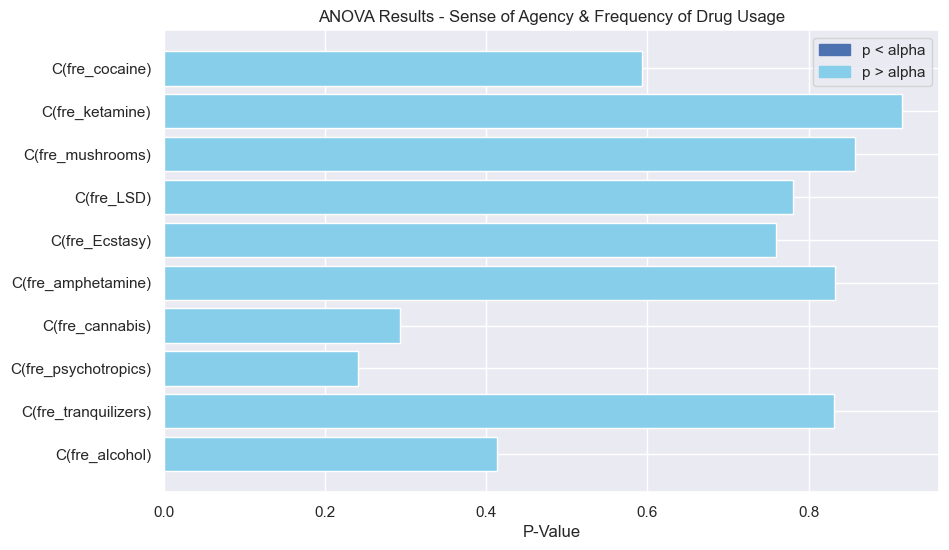

In [52]:
# Visualizing the results with a bar plot
p_values = anova_results['PR(>F)']
variables = p_values.index

alpha = 0.05
colors = ['b' if p < alpha else 'skyblue' for p in p_values]

plt.figure(figsize=(10, 6))
plt.barh(variables, p_values, color=colors)
plt.xlabel('P-Value')
plt.title('ANOVA Results - Sense of Agency & Frequency of Drug Usage')
plt.legend(handles=[mpatches.Patch(color='b', label='p < alpha'),
                    mpatches.Patch(color='skyblue', label='p > alpha')], 
           loc='upper right')

plt.show()

# Unpredictability

In [53]:
# Performing ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'Unpredictability ~ C(Cannabis) + C(Amphetamine) + C(Ecstasy) + C(LSD) + C(Mushrooms) + C(Ketamine) + C(Cocaine) + C(Q("more_than_cannabis")) + C(Q("more_than_cannabis=2"))'
model = ols(formula, data=data).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
anova_results

,sum_sq,df,F,PR(>F)
C(Cannabis),20.853008,1.0,0.829893,0.363691
C(Amphetamine),28.984371,1.0,1.153499,0.284455
C(Ecstasy),2.166229,1.0,0.086210,0.769437
C(LSD),39.637983,1.0,1.577484,0.210977
C(Mushrooms),3.662866,1.0,0.145772,0.703122
C(Ketamine),17.718837,1.0,0.705162,0.402324
C(Cocaine),2.786669,1.0,0.110902,0.739561
"C(Q(""more_than_cannabis""))",0.247966,1.0,0.009868,0.920994
"C(Q(""more_than_cannabis=2""))",0.247966,1.0,0.009868,0.920994
Residual,3970.119702,158.0,NaN,NaN


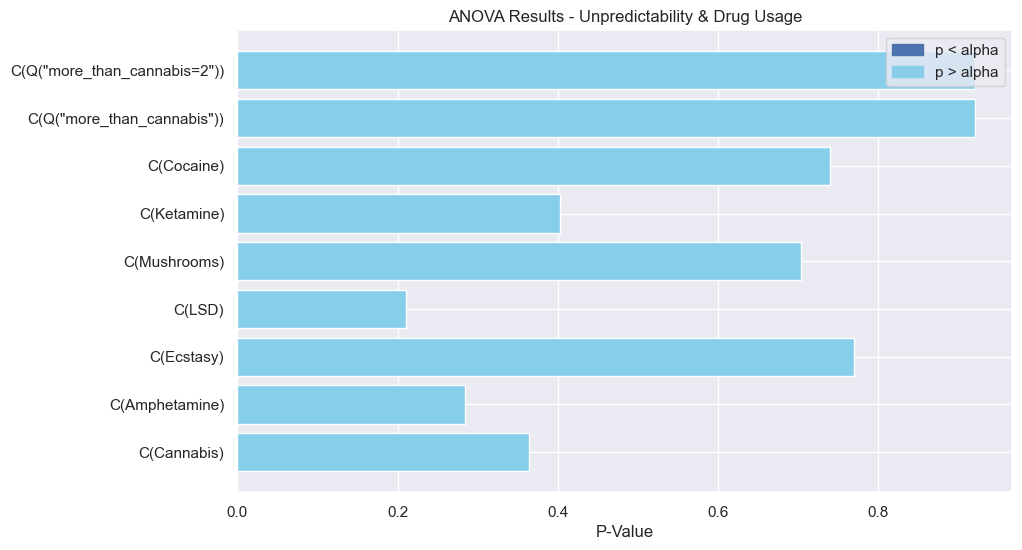

In [54]:
# Visualizing the results with a bar plot
p_values = anova_results['PR(>F)']
variables = p_values.index

alpha = 0.05
colors = ['b' if p < alpha else 'skyblue' for p in p_values]

plt.figure(figsize=(10, 6))
plt.barh(variables, p_values, color=colors)
plt.xlabel('P-Value')
plt.title('ANOVA Results - Unpredictability & Drug Usage')
plt.legend(handles=[mpatches.Patch(color='b', label='p < alpha'),
                    mpatches.Patch(color='skyblue', label='p > alpha')], 
           loc='upper right')

plt.show()

In [55]:
formula = 'Unpredictability ~ C(fre_alcohol) + C(fre_tranquilizers) + C(fre_psychotropics) + C(fre_cannabis) + C(fre_amphetamine) + C(fre_Ecstasy) + C(fre_LSD) + C(fre_mushrooms) + C(fre_ketamine) + C(fre_cocaine)'
model = ols(formula, data=data).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
anova_results

,sum_sq,df,F,PR(>F)
C(fre_alcohol),41.885684,5.0,0.342775,0.885954
C(fre_tranquilizers),48.534715,4.0,0.496485,0.738332
C(fre_psychotropics),46.235796,3.0,0.630625,0.596700
C(fre_cannabis),190.653081,8.0,0.975142,0.459033
C(fre_amphetamine),157.769917,5.0,1.291125,0.272564
C(fre_Ecstasy),103.938837,6.0,0.708828,0.643127
C(fre_LSD),122.494791,5.0,1.002447,0.419611
C(fre_mushrooms),117.952040,4.0,1.206589,0.311873
C(fre_ketamine),121.111837,6.0,0.825942,0.552119
C(fre_cocaine),65.402131,5.0,0.535224,0.749217


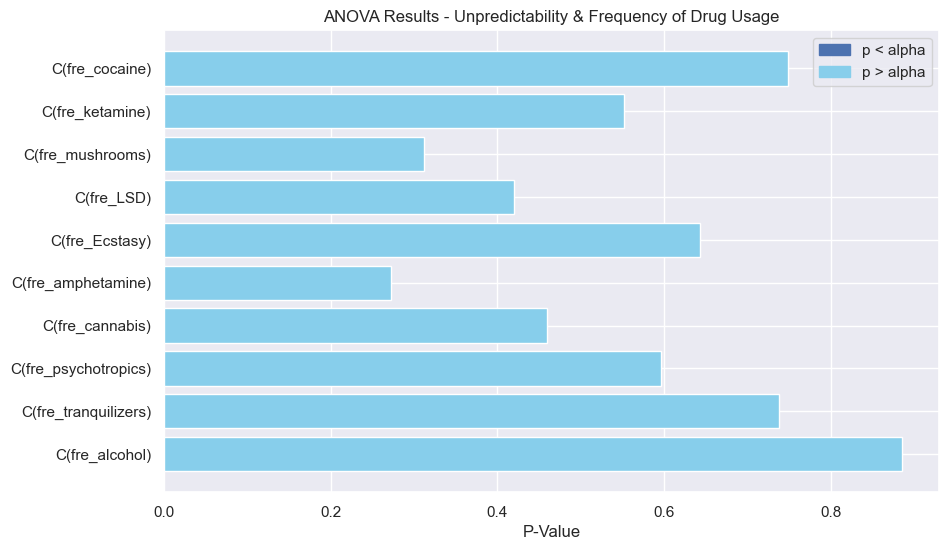

In [56]:
# Visualizing the results with a bar plot
p_values = anova_results['PR(>F)']
variables = p_values.index

alpha = 0.05
colors = ['b' if p < alpha else 'skyblue' for p in p_values]

plt.figure(figsize=(10, 6))
plt.barh(variables, p_values, color=colors)
plt.xlabel('P-Value')
plt.title('ANOVA Results - Unpredictability & Frequency of Drug Usage')
plt.legend(handles=[mpatches.Patch(color='b', label='p < alpha'),
                    mpatches.Patch(color='skyblue', label='p > alpha')], 
           loc='upper right')

plt.show()

# Free Will

In [57]:
# Performing ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'Free_will ~ C(Cannabis) + C(Amphetamine) + C(Ecstasy) + C(LSD) + C(Mushrooms) + C(Ketamine) + C(Cocaine) + C(Q("more_than_cannabis")) + C(Q("more_than_cannabis=2"))'
model = ols(formula, data=data).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
anova_results

,sum_sq,df,F,PR(>F)
C(Cannabis),2.175209,1.0,0.180981,0.671110
C(Amphetamine),29.218061,1.0,2.430996,0.120958
C(Ecstasy),3.766336,1.0,0.313366,0.576415
C(LSD),7.870993,1.0,0.654881,0.419590
C(Mushrooms),7.202655,1.0,0.599274,0.440012
C(Ketamine),0.136743,1.0,0.011377,0.915191
C(Cocaine),25.108581,1.0,2.089079,0.150336
"C(Q(""more_than_cannabis""))",11.533502,1.0,0.959608,0.328783
"C(Q(""more_than_cannabis=2""))",11.533502,1.0,0.959608,0.328783
Residual,1898.997081,158.0,NaN,NaN


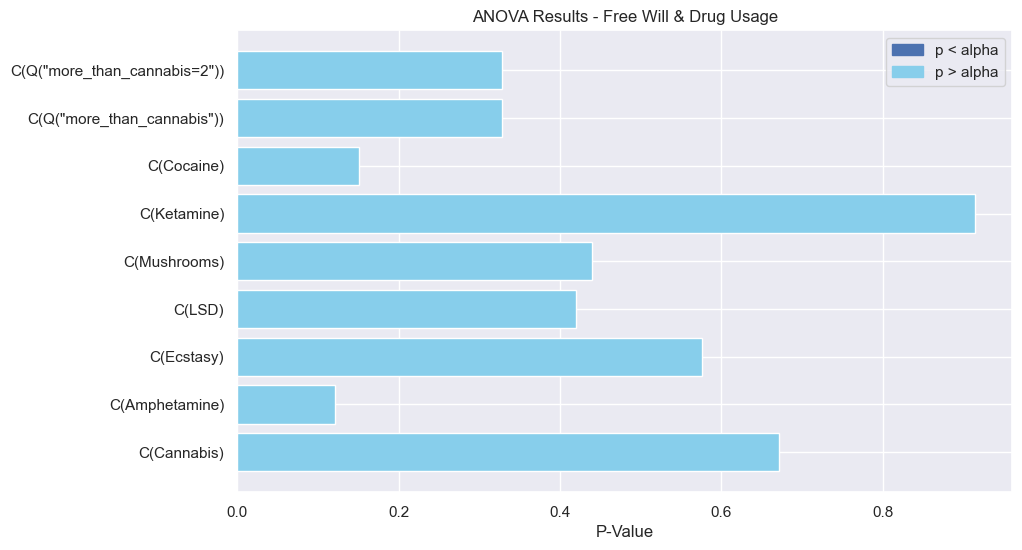

In [58]:
# Visualizing the results with a bar plot
p_values = anova_results['PR(>F)']
variables = p_values.index

alpha = 0.05
colors = ['b' if p < alpha else 'skyblue' for p in p_values]

plt.figure(figsize=(10, 6))
plt.barh(variables, p_values, color=colors)
plt.xlabel('P-Value')
plt.title('ANOVA Results - Free Will & Drug Usage')
plt.legend(handles=[mpatches.Patch(color='b', label='p < alpha'),
                    mpatches.Patch(color='skyblue', label='p > alpha')], 
           loc='upper right')

plt.show()

In [59]:
formula = 'Free_will ~ C(fre_alcohol) + C(fre_tranquilizers) + C(fre_psychotropics) + C(fre_cannabis) + C(fre_amphetamine) + C(fre_Ecstasy) + C(fre_LSD) + C(fre_mushrooms) + C(fre_ketamine) + C(fre_cocaine)'
model = ols(formula, data=data).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
anova_results

,sum_sq,df,F,PR(>F)
C(fre_alcohol),83.508182,5.0,1.546156,0.181040
C(fre_tranquilizers),74.678765,4.0,1.728349,0.148473
C(fre_psychotropics),93.609099,3.0,2.888625,0.038588
C(fre_cannabis),67.024536,8.0,0.775601,0.624946
C(fre_amphetamine),229.624282,5.0,4.251500,0.001389
C(fre_Ecstasy),102.282003,6.0,1.578128,0.159715
C(fre_LSD),18.482672,5.0,0.342207,0.886314
C(fre_mushrooms),29.219728,4.0,0.676255,0.609774
C(fre_ketamine),81.952530,6.0,1.264461,0.279277
C(fre_cocaine),96.616903,5.0,1.788865,0.120565


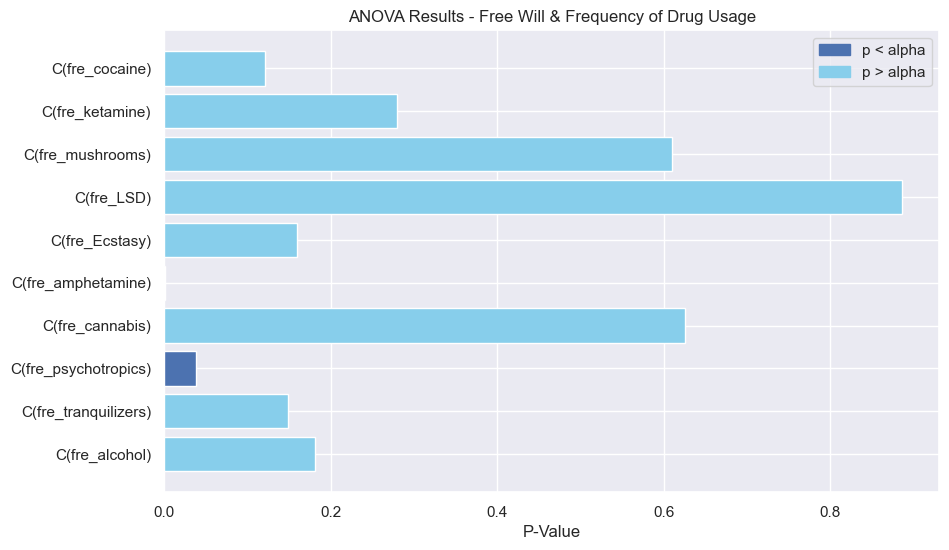

In [60]:
# Visualizing the results with a bar plot
p_values = anova_results['PR(>F)']
variables = p_values.index

plt.figure(figsize=(10, 6))

alpha = 0.05
colors = ['b' if p < alpha else 'skyblue' for p in p_values]

bars = plt.barh(variables, p_values, color=colors)
plt.xlabel('P-Value')
plt.title('ANOVA Results - Free Will & Frequency of Drug Usage')
plt.legend(handles=[mpatches.Patch(color='b', label='p < alpha'),
                    mpatches.Patch(color='skyblue', label='p > alpha')], 
           loc='upper right')

plt.show()

# IQ & Drug Usage

In [61]:
# Performing ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'IQ ~ C(Cannabis) + C(Amphetamine) + C(Ecstasy) + C(LSD) + C(Mushrooms) + C(Ketamine) + C(Cocaine) + C(Q("more_than_cannabis")) + C(Q("more_than_cannabis=2"))'
model = ols(formula, data=data).fit()

anova_results = sm.stats.anova_lm(model, typ=2)
anova_results

,sum_sq,df,F,PR(>F)
C(Cannabis),147.662504,1.0,0.610981,0.435588
C(Amphetamine),270.864547,1.0,1.120753,0.291372
C(Ecstasy),30.409266,1.0,0.125824,0.723275
C(LSD),51.027113,1.0,0.211134,0.646511
C(Mushrooms),489.873869,1.0,2.026945,0.156503
C(Ketamine),5.998566,1.0,0.024820,0.875017
C(Cocaine),46.669436,1.0,0.193104,0.660946
"C(Q(""more_than_cannabis""))",476.120504,1.0,1.970038,0.162406
"C(Q(""more_than_cannabis=2""))",476.120504,1.0,1.970038,0.162406
Residual,38185.583991,158.0,NaN,NaN


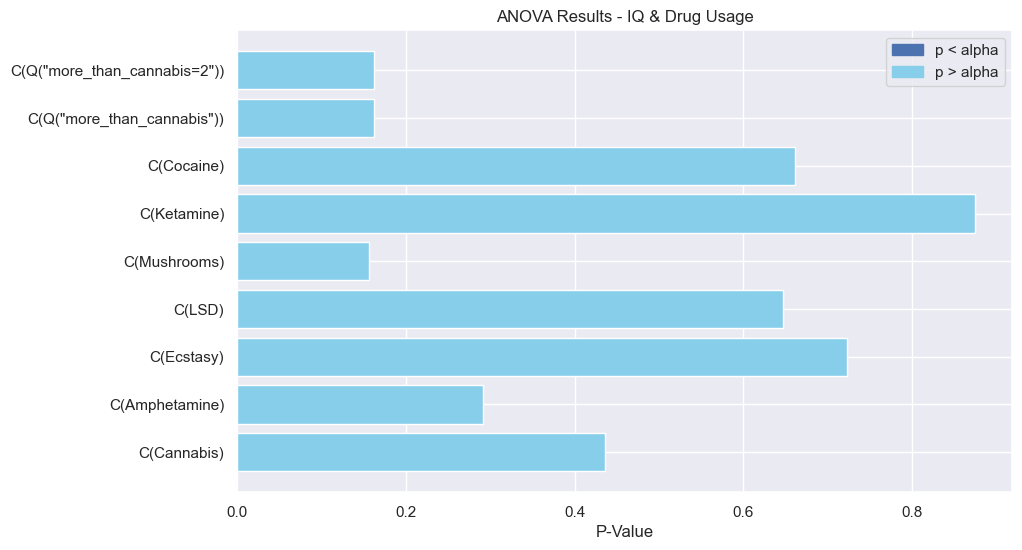

In [62]:
# Visualizing the results with a bar plot
p_values = anova_results['PR(>F)']
variables = p_values.index

alpha = 0.05
colors = ['b' if p < alpha else 'skyblue' for p in p_values]

plt.figure(figsize=(10, 6))
plt.barh(variables, p_values, color=colors)
plt.xlabel('P-Value')
plt.title('ANOVA Results - IQ & Drug Usage')
plt.legend(handles=[mpatches.Patch(color='b', label='p < alpha'),
                    mpatches.Patch(color='skyblue', label='p > alpha')], 
           loc='upper right')

plt.show()

In [63]:
formula = 'IQ ~ C(fre_alcohol) + C(fre_tranquilizers) + C(fre_psychotropics) + C(fre_cannabis) + C(fre_amphetamine) + C(fre_Ecstasy) + C(fre_LSD) + C(fre_mushrooms) + C(fre_ketamine) + C(fre_cocaine)'
model = ols(formula, data=data).fit()

anova_results = sm.stats.anova_lm(model, typ=2)
anova_results

,sum_sq,df,F,PR(>F)
C(fre_alcohol),869.570658,5.0,0.668069,0.648429
C(fre_tranquilizers),655.791854,4.0,0.629786,0.642223
C(fre_psychotropics),1062.364901,3.0,1.360314,0.258507
C(fre_cannabis),1659.933836,8.0,0.797053,0.606312
C(fre_amphetamine),614.826156,5.0,0.472356,0.796209
C(fre_Ecstasy),478.176743,6.0,0.306143,0.932640
C(fre_LSD),1859.324336,5.0,1.428472,0.219245
C(fre_mushrooms),3283.814547,4.0,3.153591,0.016824
C(fre_ketamine),787.453639,6.0,0.504151,0.804148
C(fre_cocaine),269.323673,5.0,0.206915,0.958998


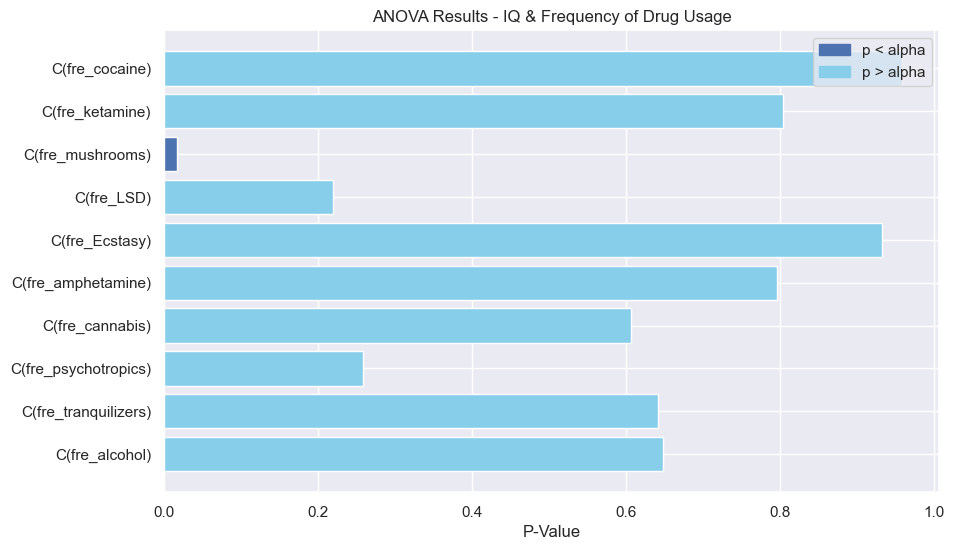

In [64]:
# Visualizing the results with a bar plot
p_values = anova_results['PR(>F)']
variables = p_values.index

alpha = 0.05
colors = ['b' if p < alpha else 'skyblue' for p in p_values]

plt.figure(figsize=(10, 6))
plt.barh(variables, p_values, color=colors)
plt.xlabel('P-Value')
plt.title('ANOVA Results - IQ & Frequency of Drug Usage')
plt.legend(handles=[mpatches.Patch(color='b', label='p < alpha'),
                    mpatches.Patch(color='skyblue', label='p > alpha')], 
           loc='upper right')

plt.show()

# IQ & Personality Traits

In [65]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

numeric_data = data.select_dtypes(include=['float64', 'int64'])

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(numeric_data)
normalized_df = pd.DataFrame(normalized_data, columns=numeric_data.columns)

In [66]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

numeric_data = data.select_dtypes(include=['float64', 'int64'])

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(numeric_data)
normalized_df = pd.DataFrame(normalized_data, columns=numeric_data.columns)

data1 = normalized_df[['IQ','Sense_of_agency','Intentionality_bias','Free_will','Unpredictability']]

X = data1.drop('IQ', axis = 1).values
Y = data1['IQ']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, test_size = 0.20, random_state=42)

#Fitting the linear regression model
lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_train)

print('The Accuracy  on the training dataset is: ',
      lm.score(X_train, Y_train) )
#print('The Accuracy n2  on the training dataset is: ',
#      r2_score(Y_train,Y_pred) )   

# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', 
      lm.score(X_test, Y_test) )

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',
      sqrt(mean_squared_error(Y_train,Y_pred)))
print('The RMSE  on the testing dataset is: ',
      sqrt(mean_squared_error(Y_test,lm.predict(X_test))))

# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',
      mean_absolute_error(Y_train,Y_pred))
print('The MAE  on the testing dataset is: ',
      mean_absolute_error(Y_test,lm.predict(X_test)))

# Coefficients
print('Coefficients:', lm.coef_ )

# The Intercept
print('Intercept: ', lm.intercept_)

The Accuracy  on the training dataset is:  0.008028166553156635
The Accuracy  on the testing dataset is:  -0.003440296719137148
The RMSE  on the training dataset is:  0.2615635062258528
The RMSE  on the testing dataset is:  0.3236016989904633
The MAE  on the training dataset is:  0.2112399375836739
The MAE  on the testing dataset is:  0.2703447048954109
Coefficients: [ 0.00822228 -0.09582034  0.01291711 -0.02524624]
Intercept:  0.5835233415134617


In [67]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, Y_train, Y_test = train_test_split(X_poly, Y, train_size=0.80, test_size=0.20, random_state=42)

# Fitting the polynomial regression model
poly_lm = LinearRegression(fit_intercept=True)
poly_lm.fit(X_train_poly, Y_train)
Y_pred_poly_train = poly_lm.predict(X_train_poly)

# Model Accuracy on training dataset
print('The R^2 on the training dataset is:', poly_lm.score(X_train_poly, Y_train))
#print('The R^2 on the training dataset is:', r2_score(Y_train, Y_pred_poly_train))

# Model Accuracy on testing dataset
Y_pred_poly_test = poly_lm.predict(X_test_poly)
print('The R^2 on the testing dataset is:', poly_lm.score(X_test_poly, Y_test))

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is:', sqrt(mean_squared_error(Y_train, Y_pred_poly_train)))
print('The RMSE on the testing dataset is:', sqrt(mean_squared_error(Y_test, Y_pred_poly_test)))

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is:', mean_absolute_error(Y_train, Y_pred_poly_train))
print('The MAE on the testing dataset is:', mean_absolute_error(Y_test, Y_pred_poly_test))

# Coefficients
print('Coefficients:', poly_lm.coef_)

# The Intercept
print('Intercept:', poly_lm.intercept_)

The R^2 on the training dataset is: 0.8861418959275826
The R^2 on the testing dataset is: -54942.86397203198
The RMSE on the training dataset is: 0.0886154513666248
The RMSE on the testing dataset is: 75.7224441203341
The MAE on the training dataset is: 0.0627555731433848
The MAE on the testing dataset is: 29.4291402621904
Coefficients: [-8.27063547e+12 -3.35775146e+02  1.17991979e+03 -8.10236016e+02
  1.01761049e+03  4.16228903e+02 -2.38911325e+02  6.66541479e+03
 -4.19681275e+03 -5.68816275e+02 -4.48362213e+03 -5.10902091e+03
  2.28237604e+03  7.85308110e+02 -9.17529542e+01  3.30484575e+03
  2.19105025e+03 -1.19670269e+04 -2.39178424e+03 -1.10806197e+04
  3.95414832e+03  1.70279160e+04 -6.43018001e+03 -1.24871816e+04
  1.42051508e+04 -9.57951869e+02  1.26875496e+04  7.19471286e+03
 -6.57927613e+02  1.02336485e+03 -3.46017092e+02 -2.06356306e+03
 -2.66083854e+03  7.32709968e+03 -7.33002087e+03 -4.15904071e+03
 -1.10823542e+04  1.45816550e+03  1.25200757e+04  1.56535170e+04
  1.6498454

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.model_selection import cross_val_score

# Assuming you have your original data loaded and normalized_df as in your original code

# Select relevant features
data1 = normalized_df[['IQ', 'Intentionality_bias', 'Sense_of_agency', 'Unpredictability', 'Free_will']]

# Features and target variable
X = data1.drop('IQ', axis=1)
Y = data1['IQ']

# Polynomial Features
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)

# Feature Scaling
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Split the dataset into training and testing sets
X_train_poly, X_test_poly, Y_train, Y_test = train_test_split(X_poly_scaled, Y, train_size=0.80, test_size=0.20, random_state=42)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_poly, Y_train)

# Model Accuracy on training dataset
Y_pred_ridge_train = ridge.predict(X_train_poly)
print('The R^2 on the training dataset is:', r2_score(Y_train, Y_pred_ridge_train))


# Model Accuracy on testing dataset
Y_pred_ridge_test = ridge.predict(X_test_poly)
print('The R^2 on the testing dataset is:', r2_score(Y_test, Y_pred_ridge_test))

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is:', sqrt(mean_squared_error(Y_train, Y_pred_ridge_train)))
print('The RMSE on the testing dataset is:', sqrt(mean_squared_error(Y_test, Y_pred_ridge_test)))

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is:', mean_absolute_error(Y_train, Y_pred_ridge_train))
print('The MAE on the testing dataset is:', mean_absolute_error(Y_test, Y_pred_ridge_test))

# Coefficients
print('Coefficients:', ridge.coef_)

# The Intercept
print('Intercept:', ridge.intercept_)


The R^2 on the training dataset is: 0.25585397050196634
The R^2 on the testing dataset is: 0.015688817339647776
The RMSE on the training dataset is: 0.22654608657388373
The RMSE on the testing dataset is: 0.3205023615103252
The MAE on the training dataset is: 0.17803695365243968
The MAE on the testing dataset is: 0.2711892933263969
Coefficients: [ 0.         -0.01829014  0.02711617  0.10450587  0.11960849 -0.02267237
 -0.00655887  0.02251959 -0.05039626 -0.01266573 -0.00076477  0.08826458
  0.00800962 -0.02281527 -0.04576701 -0.00546833 -0.00259997 -0.03440799
 -0.05070416 -0.08309636  0.00505097 -0.01342209  0.05822438  0.00500486
  0.00621967 -0.00039617 -0.0387204  -0.00700915 -0.05939368 -0.00627012
 -0.00562155 -0.04551546 -0.03777877 -0.08878939 -0.04319084  0.02490799
  0.04175252 -0.04202223 -0.01509201 -0.06090474 -0.07606959 -0.03424959
  0.0233346   0.0178416   0.04328739 -0.05075373 -0.03873149  0.02868655
  0.0504752   0.06770211 -0.00376623  0.04386219  0.01849067 -0.0719

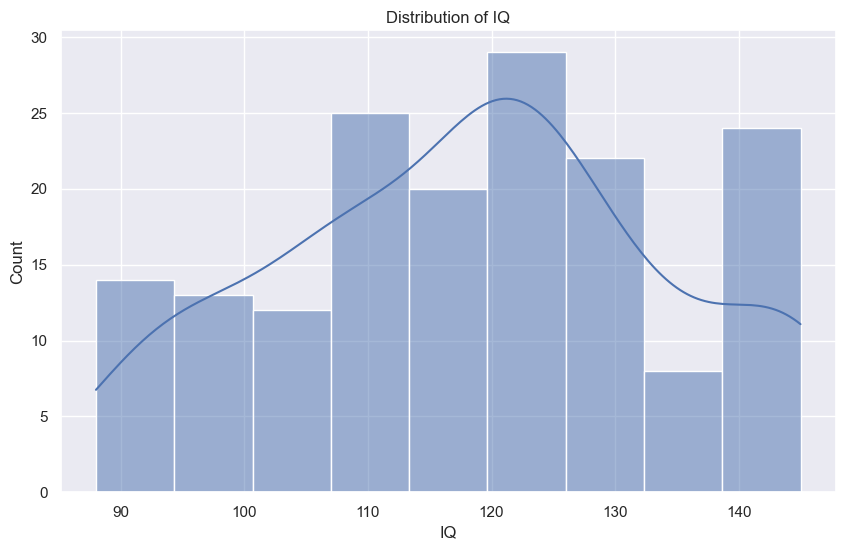

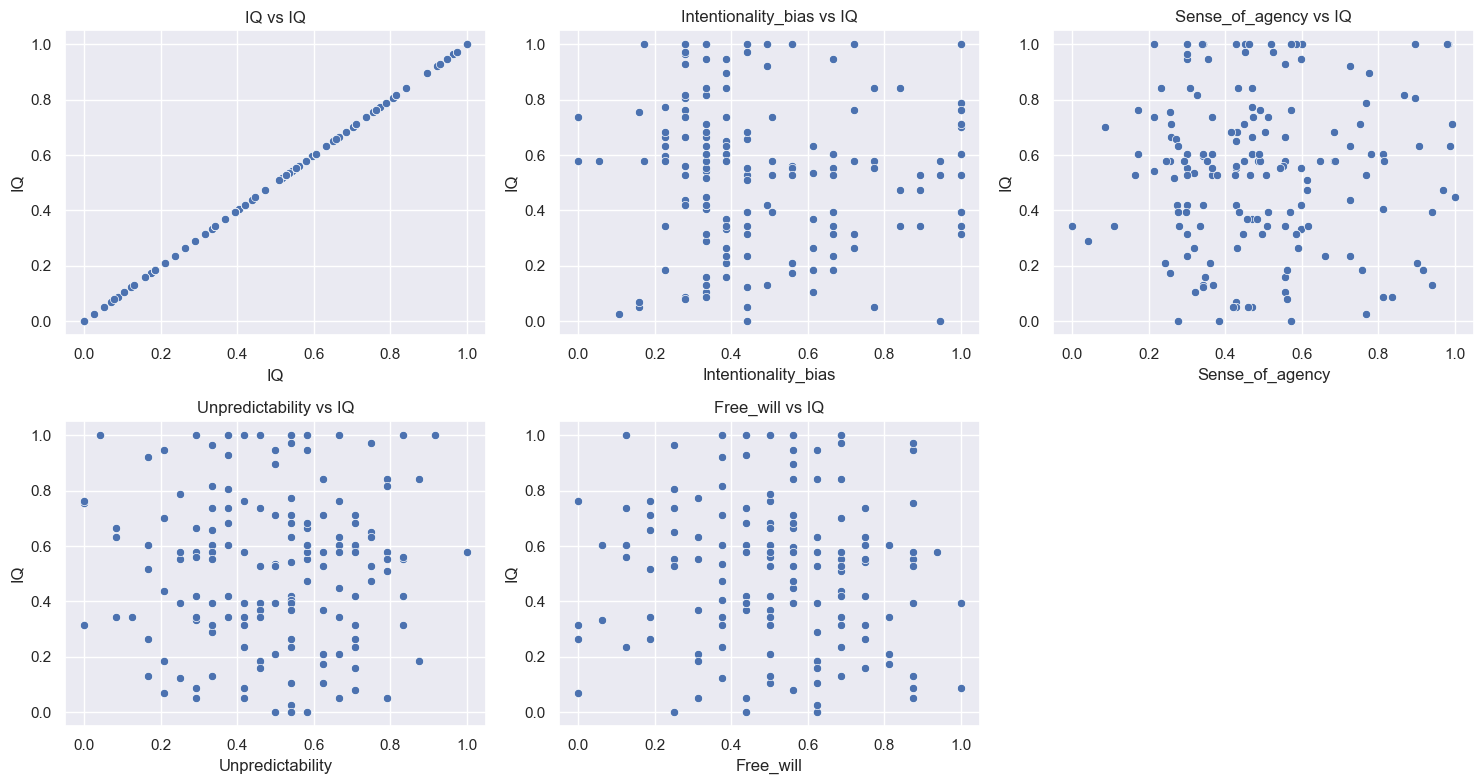

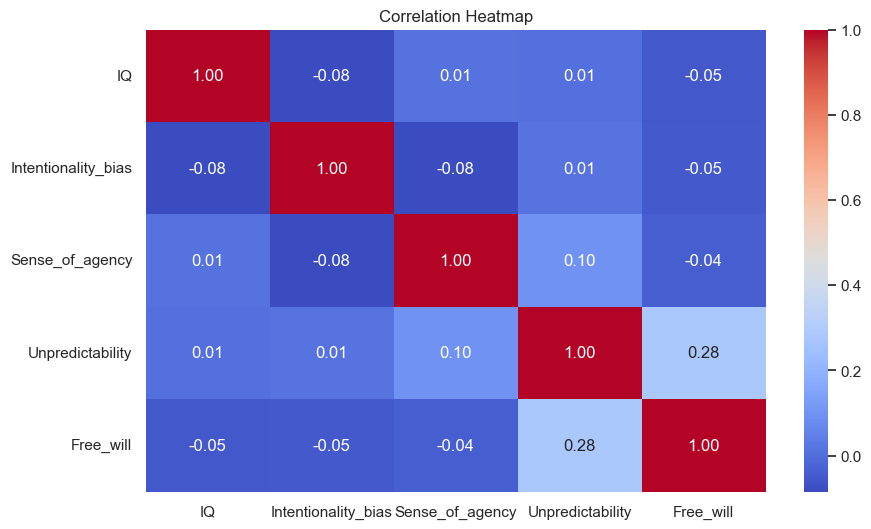

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Target Variable Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['IQ'], kde=True)
plt.title('Distribution of IQ')
plt.show()

# Relationship Between Features and Target
plt.figure(figsize=(15, 8))
for i, feature in enumerate(data1.columns):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=data1[feature], y=data1['IQ'])
    plt.title(f'{feature} vs IQ')
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data1.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# OBJ 5 - Impacts of the Drugs on Different People - Logistic Regression

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, accuracy_score
import statsmodels.api as sm
import numpy as np

# Assuming your data is stored in a DataFrame called 'data'

# List of drugs
drugs = ['Cannabis', 'LSD', 'Cocaine', 'Ecstasy', 'Ketamine', 'Amphetamine', 'Mushrooms']

for drug in drugs:
    # Extract predictors (X) and target variable (Y) for the current drug
    X = data[['Age', 'IQ', 'Narcissism']]
    y = data[drug]

    # Convert target variable to numeric format (0 or 1)
    label_encoder = LabelEncoder()
    y_numeric = label_encoder.fit_transform(y)
    
    # Apply SMOTE over-sampling
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y_numeric)  # Use the numeric version of y

    # Split the resampled data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42)

    # Standardize numerical variables
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit a logistic regression model
    model = LogisticRegression()
    model.fit(X_train_scaled, y_train)

    # Use statsmodels to get p-values
    X_train_sm = sm.add_constant(X_train_scaled)
    logistic_model = sm.Logit(y_train, X_train_sm)
    result = logistic_model.fit()
    
    # Predictions on the test set
    y_pred = model.predict(X_test_scaled)

    # Calculate evaluation metrics
    precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
    recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
    f1 = f1_score(y_test, y_pred, pos_label=1, zero_division=0)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    
    auc_roc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
    
    accuracy = accuracy_score(y_test, y_pred)

    # Print results for each drug
    print(f"\nMetrics for {drug} ")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    
    # Print only p-values from the logistic regression summary
    print(f"\nP-values for {drug}")
    coefficient_labels = ['Constant', 'Age', 'IQ', 'Narcissism']
    for i, p_value in enumerate(result.pvalues):
        print(f"{coefficient_labels[i]}: {round(p_value, 4)}")

Optimization terminated successfully.
         Current function value: 0.636054
         Iterations 5

Metrics for Cannabis 
Precision: 0.4615
Recall: 0.8571
F1-Score: 0.6000
Specificity: 0.5000
AUC-ROC: 0.7143
Accuracy: 0.6190

P-values for Cannabis
Constant: 0.5356
Age: 0.0005
IQ: 0.0415
Narcissism: 0.6685
Optimization terminated successfully.
         Current function value: 0.621778
         Iterations 5

Metrics for LSD 
Precision: 0.8182
Recall: 0.6000
F1-Score: 0.6923
Specificity: 0.8333
AUC-ROC: 0.8111
Accuracy: 0.7037

P-values for LSD
Constant: 0.8305
Age: 0.0
IQ: 0.0042
Narcissism: 0.2397
Optimization terminated successfully.
         Current function value: 0.613213
         Iterations 5

Metrics for Cocaine 
Precision: 1.0000
Recall: 0.6429
F1-Score: 0.7826
Specificity: 1.0000
AUC-ROC: 0.9167
Accuracy: 0.8077

P-values for Cocaine
Constant: 0.9353
Age: 0.0
IQ: 0.6959
Narcissism: 0.4177
Optimization terminated successfully.
         Current function value: 0.564876
        

Optimization terminated successfully.
         Current function value: 0.636054
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.621778
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.613213
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.564876
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597238
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582155
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601169
         Iterations 5


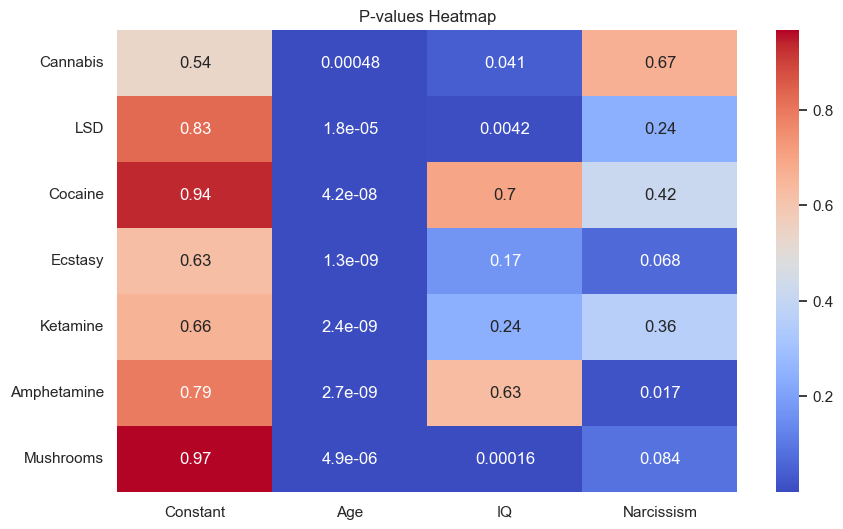

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a matrix of p-values for all drugs
p_values_matrix = np.zeros((len(drugs), len(coefficient_labels)))

for drug_index, drug in enumerate(drugs):
    X = data[['Age', 'IQ', 'Narcissism']]
    y = data[drug]

    label_encoder = LabelEncoder()
    y_numeric = label_encoder.fit_transform(y)

    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y_numeric)

    X_train, _, y_train, _ = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    X_train_sm = sm.add_constant(X_train_scaled)
    logistic_model = sm.Logit(y_train, X_train_sm)
    result = logistic_model.fit()

    p_values_matrix[drug_index, :] = result.pvalues

# Create a heatmap using seaborn
sns.set(font_scale=1.0)
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(p_values_matrix, annot=True, cmap="coolwarm", xticklabels=coefficient_labels, yticklabels=drugs)
plt.title('P-values Heatmap')
plt.show()